<a href="https://colab.research.google.com/github/wlgns0313/test1/blob/main/chapter04_getting_started_with_neural_networks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #영화 감상평 관련 글의 단어들이 "index" 데이터셋으로 존재 Ex. This movie is fantastic의 네 단어가 각각 "index" 데이터 1개씩으로 인식
    #사용 가능한 단어를 10000개까지로 한정

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]
#아래는 train_data 전체인데, list 하나에 문장 하나씩, 그리고 문장을 이루는 단어들이 index로 표현 되었음을 알 수 있음

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
max([max(sequence) for sequence in train_data]) #10000개 있음을 보임

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index() #단어를 index로 변환
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #word_index의 반대 : index를 단어로 변환
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # 0번, 1번, 2번 index를 제외하고 단어 변환을 하기 위해 -3 (0번, 1번, 2번은 영화 리뷰 단어가 아닌 여백과 같은 속성임)
decoded_review #무슨 문장 암호화한 건지 알 수 있음

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #25,000 (데이터 50,000개 중 train과 test 데이터가 각각 25,000개씩 있다고 수업에 설명함) * 10,000 (num_of_words로 위에서 설정함), 싹 다 0으로 시작
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #i번째 sequence에서 j번째 단어들이 사용됨 (예를 들어, This movie is good이 3, 5, 100, 2번째 인덱스 데이터라 하면 3, 5, 100, 2번째 원소들이 1로 치환), 25,000번 행까지 쭈욱 감
    return results
x_train = vectorize_sequences(train_data) #train_data에 대해 25,000 * 10,000짜리 만듦
x_test = vectorize_sequences(test_data) #test_data에 대해 25,000 * 10,000짜리 만듦

In [ ]:
word_index #단어가 무엇으로 암호화되었는지 알려줌

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
x_train[0] #사용된 단어 인덱스 부분이 1로 바뀜을 확인

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #relu를 통해 치역을 0 이상으로 정의
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #마지막 Units가 1인 이유 : 좋냐 안 좋냐만 따지면 됨 /sigmoid : 치역을 실수 전체 집합에서 (0,1)로 정의 (0에 가까울수록 Negative, 1에 가까울수록 Positive)
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop", #optimizer 설정 (learning_rate를 따로 설정할 수도 있음)
              loss="binary_crossentropy", #loss_function, binary인 이유는 0과 1 (Negative와 Positive) 로만 결과가 나오는 이항 형태이기 때문
              metrics=["accuracy"]) #평가지표

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000] #0번 인덱스에서 10000번 인덱스까지 지정
partial_x_train = x_train[10000:] #x_val 제외한 나머지 데이터를 통해 training 예정
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #fitting하는지 안 하는지 유효성 검증하고자 남겨둔 Sample

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6820 - loss: 0.6236 - val_accuracy: 0.8584 - val_loss: 0.4389
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8847 - loss: 0.3869 - val_accuracy: 0.8801 - val_loss: 0.3353
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9149 - loss: 0.2731 - val_accuracy: 0.8880 - val_loss: 0.2923
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9337 - loss: 0.2132 - val_accuracy: 0.8891 - val_loss: 0.2781
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9433 - loss: 0.1805 - val_accuracy: 0.8874 - val_loss: 0.2772
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9561 - loss: 0.1472 - val_accuracy: 0.8860 - val_loss: 0.2821
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9671 - loss: 0.1234 - val_accuracy: 0.8852 - val_loss: 0.2970
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9690 - loss: 0.1101 - val_accuracy: 0.8757 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

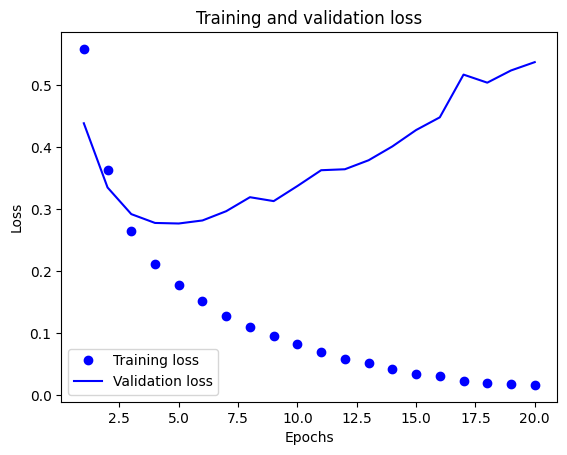

In [ ]:
#loss를 보여주는 그래프
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#그림을 보면 Training_loss는 줄어드는데, epoch=4 이후로 validation_loss가 늘어남 -> partial_x_train에는 잘 맞는데, 너무 partial_x_train에만 맞춰지는 바람에 x_val에는 fitting하지 않음 (overfitting)
#epoch를 너무 늘린 바람에 partial_x_train에게만 치중된 모델이 되어버린 것 -> epoch=4에서 validation_loss가 최소치이고 training_loss도 적정 수준이므로 epoch=4로 수정하여 실행

**Plotting the training and validation accuracy**

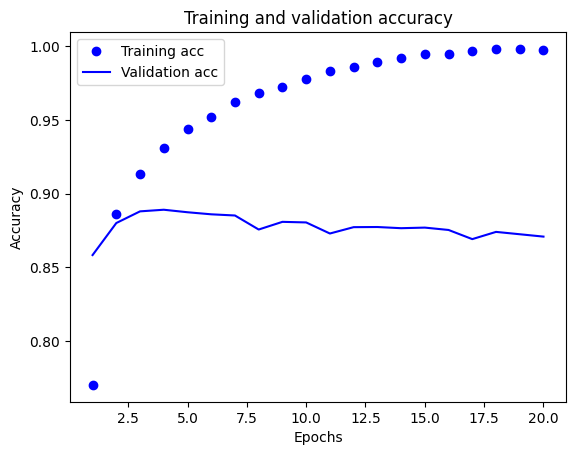

In [ ]:
#accuracy를 보여주는 그래프
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
#epoch=4에서 validation_loss가 최소치이고 training_loss도 적정 수준이므로 epoch=4로 수정하여 실행 (나머지는 안 건드림)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7313 - loss: 0.5529
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9016 - loss: 0.2802
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9254 - loss: 0.2131
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9347 - loss: 0.1771
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8826 - loss: 0.2915


In [ ]:
results # [0] 인덱스 = loss, [1] 인덱스 = accuracy

[0.28860580921173096, 0.8848000168800354]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.1947055 ],
       [0.99978226],
       [0.86384314],
       ...,
       [0.1106238 ],
       [0.07548165],
       [0.6666151 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
#영화 리뷰할 때랑 똑같음

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
#영화 리뷰할 때랑 똑같음
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. #문장의 topic의 인덱스에 맞춰 원소 변환 -> topic이 sports이고 sports가 5번 데이터라 가정하면 5번 인덱스를 1로 바꿈
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels) #위에 to_one_hot 역할을 to_categorical에 넣기만 하면 알아서 다 해줌

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #topic이 46개이므로 units도 46개로 설정
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #범주형 자료를 다루므로 categorical
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000] #validation 데이터 따로
partial_x_train = x_train[1000:] #train 데이터 따로
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.3709 - loss: 3.2110 - val_accuracy: 0.5880 - val_loss: 1.8990
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6452 - loss: 1.6921 - val_accuracy: 0.6940 - val_loss: 1.3806
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7378 - loss: 1.2188 - val_accuracy: 0.7420 - val_loss: 1.1789
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7971 - loss: 0.9752 - val_accuracy: 0.7730 - val_loss: 1.0715
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8262 - loss: 0.8108 - val_accuracy: 0.7980 - val_loss: 0.9899
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8525 - loss: 0.6908 - val_accuracy: 0.8020 - val_loss: 0.9483
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8823 - loss: 0.5740 - val_accuracy: 0.8030 - val_loss: 0.9141
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9024 - loss: 0.4807 - val_accuracy: 0.8090 - 

**Plotting the training and validation loss**

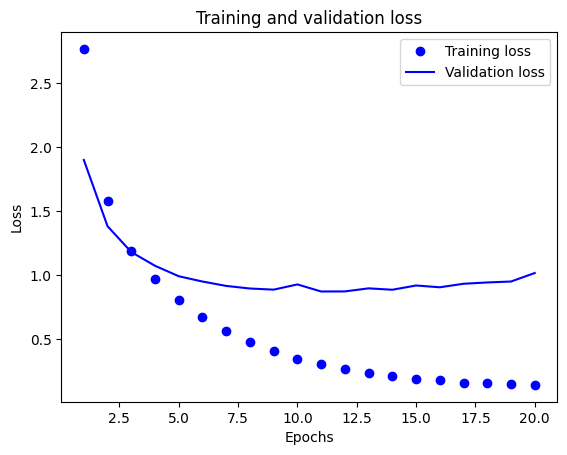

In [ ]:
#loss를 보여주는 그래프
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#epochs = 9 인 시점에서 overfitting 시작됨 (training_loss가 적정 수준이고 validation_loss가 최소치인 곳을 기준으로 다시 training 진행)

**Plotting the training and validation accuracy**

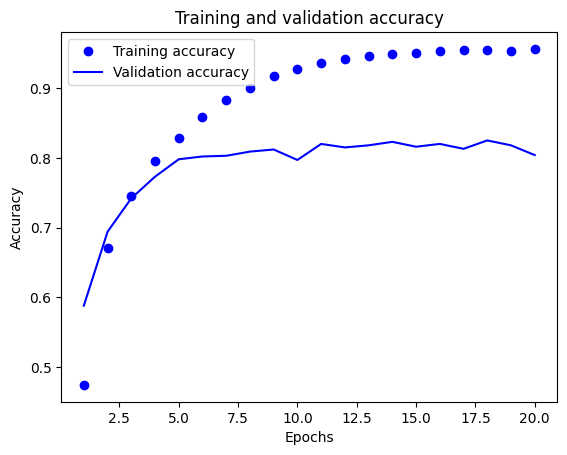

In [ ]:
#accuracy를 보여주는 그래프
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
#epochs = 9일 때 제일 적당하므로 epochs만 건드리고 나머지는 다 똑같이 하여 진행

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3664 - loss: 3.1476
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6655 - loss: 1.5854
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7480 - loss: 1.1713
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7960 - loss: 0.9612
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8385 - loss: 0.7687
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8537 - loss: 0.6657
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8803 - loss: 0.5480
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8997 - loss: 0.4659
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9141 - loss: 0.3940
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.9117


In [ ]:
results # [loss, accuracy]

[0.9314450621604919, 0.7925200462341309]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()
#model로 구하면 accuracy는 약 79퍼인데 랜덤으로 했을 경우인 17퍼에 비해 매우 높음 -> 모델 성능 Good

np.float64(0.170080142475512)

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
predictions[0].shape #46개의 topic

(46,)

In [ ]:
np.sum(predictions[0]) #합은 이론적으로는 1

np.float32(0.9999999)

In [ ]:
np.argmax(predictions[0])

np.int64(4)

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #loss_function을 sparse버전으로 바꿈
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"), #중간 layer을 4로 바꿈 (output이 4가 되도록 바꿈 -> 테스트 결과 accuracy가 80퍼 정도 (units=64) 에서 72퍼 정도 (units=4) 로 급감함 : 교수님께서 이거 하지 말라 함)
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3330 - loss: 2.9790 - val_accuracy: 0.4540 - val_loss: 1.8617
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5714 - loss: 1.7078 - val_accuracy: 0.6300 - val_loss: 1.4763
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6562 - loss: 1.3565 - val_accuracy: 0.6400 - val_loss: 1.3707
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6757 - loss: 1.2016 - val_accuracy: 0.6760 - val_loss: 1.3218
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7196 - loss: 1.0848 - val_accuracy: 0.6910 - val_loss: 1.2948
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7494 - loss: 0.9971 - val_accuracy: 0.7000 - val_loss: 1.2773
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7620 - loss: 0.9318 - val_accuracy: 0.7020 - val_loss: 1.3102
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7858 - loss: 0.8353 - val_accuracy: 0.7100 - v

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() #데이터 불러옴

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean # X - u
std = train_data.std(axis=0)
train_data /= std # (X-u)/sd
test_data -= mean # X-u
test_data /= std # (X-u)/sd
# 정규화 작업 : Z = (X-u)/sd

In [8]:
train_data[:2]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239]])

### Building your model

**Model definition**

In [10]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #activation을 따로 지정하지 않음
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) #loss : mean square error, metrics : mean absolute error (오차의 절댓값 평균)
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
# 데이터를 K등분한 후 각 데이터 파트를 A1, ... , Ak라 하자
# Ai (i = 1,2, ..., k) 을 validation data, 나머지를 training data로 하여 loss를 계산하는 것을 K-fold valdiation이라고 함 (k개의 loss 값 평균치 계산)

In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
k = 4
num_val_samples = len(train_data) // k # 데이터 4등분
num_epochs = 100
all_scores = [] #여기에 validation score 나타남
for i in range(k): # i=0~4 (k 범위)까지 아래 명령 실행
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0) #이 방식을 채택하면 4번째 fold의 결과만 남음 -> 전체 모델의 accuracy와 val_loss 계산 불가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #위에서 mse, mae를 각각 loss function과 metrics로 지정했기에 val_mse, val_mae 계산
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [13]:
all_scores #fold가 4개이므로 validation score도 4개 나옴

[1.938896894454956, 2.3954079151153564, 2.515981674194336, 2.3770928382873535]

In [14]:
np.mean(all_scores) #validation score의 평균 (우리가 원하는 값)

np.float64(2.3068448305130005)

**Saving the validation logs at each fold**

In [15]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) #history를 지정하여 1번째~4번째 fold의 데이터를 저장 -> 전체 모델의 accuracy와 val_loss 계산 가능
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history) #전체 history의 각 i번째 fold의 history 저장

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
len(all_mae_histories)

4

In [17]:
len(all_mae_histories[0]) #epochs 수만큼 나옴

500

**Building the history of successive mean K-fold validation scores**

In [24]:
np.mean([x[0] for x in all_mae_histories])
#아래 코드의 각 원소를 확인 가능

np.float64(19.540666103363037)

In [25]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] #fold의 validation 값 평균 나옴 (k=4이므로 4개 나옴)

**Plotting validation scores**

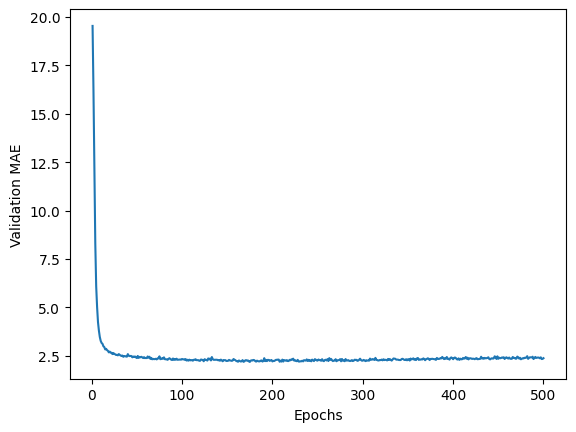

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
#그래프에서 x=10까지의 치역이 너무 높아 그 이후 그래프를 제대로 해석하기 어려움 -> 다음 코드에서 앞의 10개 데이터 지우고 그래프 재확인

**Plotting validation scores, excluding the first 10 data points**

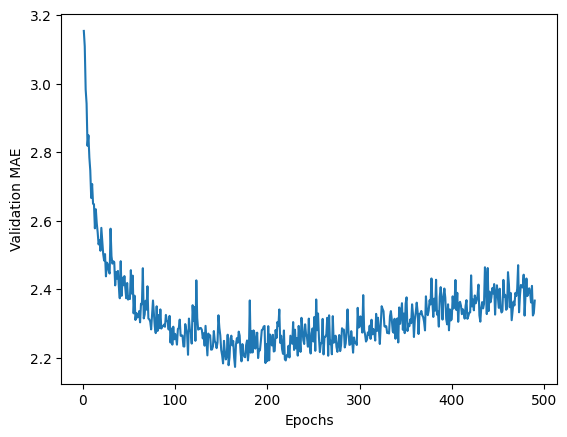

In [27]:
truncated_mae_history = average_mae_history[10:] #데이터를 10번 인덱스부터 나오도록 하여 치역이 낮은 값들을 더 정확히 보여주도록 함
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
#epochs가 130 부근일 때 validation score가 가장 높게 나오는 편

**Training the final model**

In [28]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0) #epochs를 130 즈음으로 맞추고 다시 model 돌림 -> validation MAE 최대치가 나오는 epochs에서 실행
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 13.3563 - mae: 2.6420


In [29]:
test_mae_score #validation score 확인

2.8401403427124023

### Generating predictions on new data

In [31]:
predictions = model.predict(test_data)
predictions[0] # prediction 확인하기

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([10.099076], dtype=float32)

### Wrapping up

## Summary